# dataSet url 
https://www.kaggle.com/datasets/darshanprabhu09/california-housing-dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataSet = pd.read_csv("./data/housing.csv")

print(dataSet.info())
dataSet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#check missing value
dataSet.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [4]:
# fill the continuous missing value by mean
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
dataSet["total_bedrooms"] = mean_imputer.fit_transform(dataSet["total_bedrooms"].values.reshape(-1, 1))
dataSet.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [5]:
# one hot encode the category variable
dataSet = pd.get_dummies(dataSet)
dataSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [6]:
# feature scaling
IndependentV = dataSet.drop(columns=["median_house_value"])
dependentV = dataSet["median_house_value"].to_frame()
IndependentV_columns = IndependentV.columns

from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
IndependentV = pd.DataFrame( stdScaler.fit_transform(IndependentV), columns=IndependentV_columns )

std_dataSet = pd.concat([IndependentV, dependentV], axis=1)
std_dataSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,452600.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,358500.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,352100.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,341300.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,342200.0


,median_house_value
longitude,-0.045967
latitude,-0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049454
population,-0.024650
households,0.065843
median_income,0.688075
ocean_proximity_<1H OCEAN,0.256617
ocean_proximity_INLAND,-0.484859


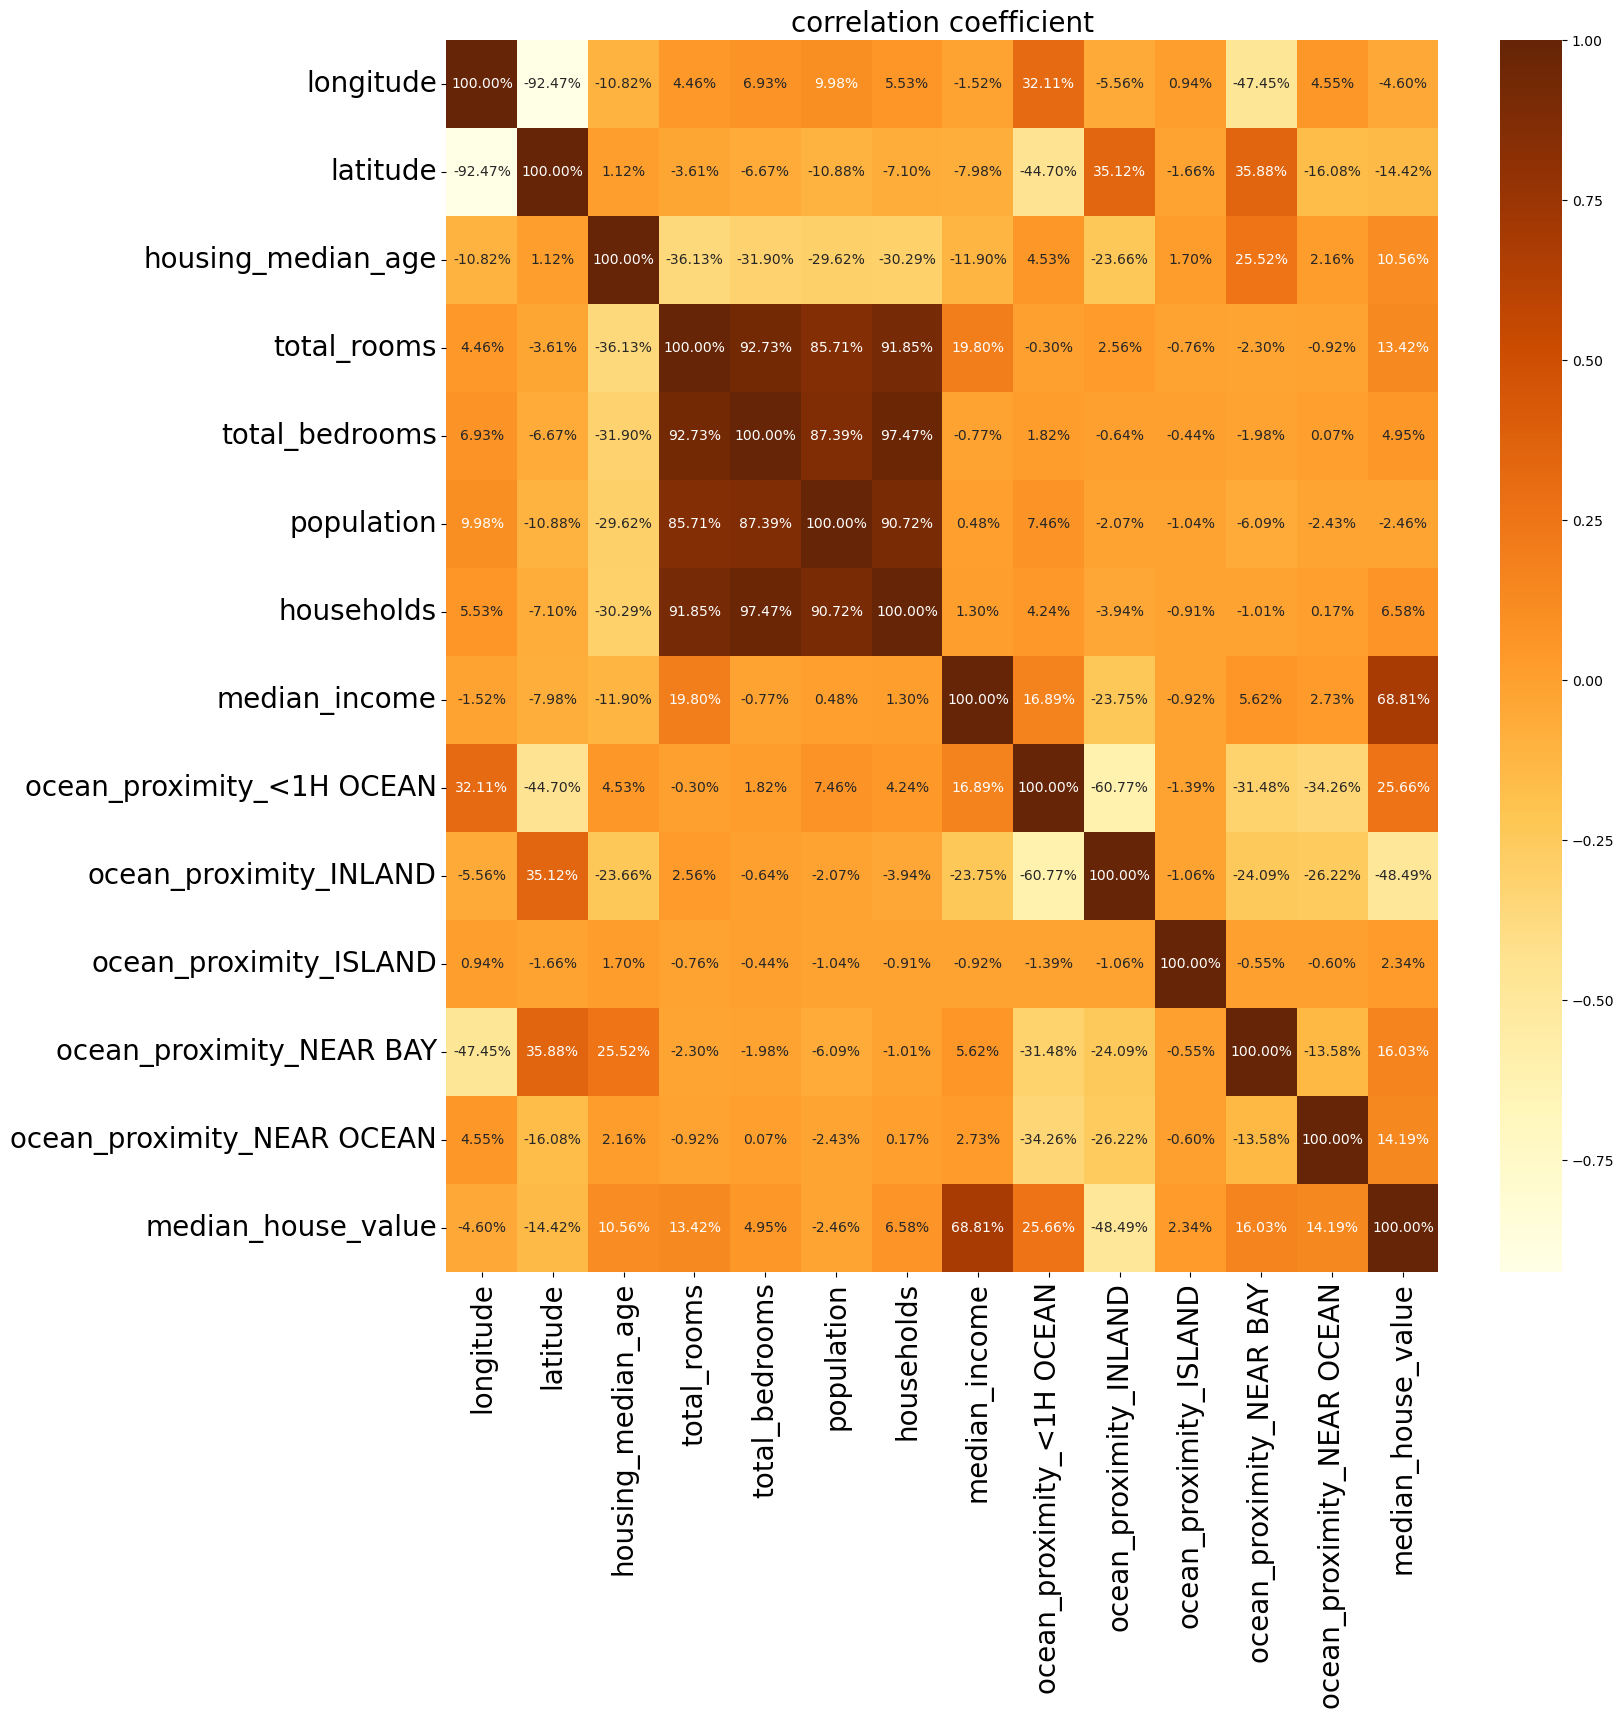

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
data_corr = std_dataSet.corr()

plt.figure(figsize=(16, 16))
corr_heatmap = sns.heatmap(data_corr, cmap="YlOrBr", annot=True, fmt=".2%")
plt.title("correlation coefficient", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

median_house_value_corr = data_corr["median_house_value"].to_frame()
median_house_value_corr = median_house_value_corr.drop(index="median_house_value")
def color_positive_green(val):
    if val > 0:
        color = 'green'
    else:
        color = 'red'
    return f"color: {color}"
 
median_house_value_corr.style.applymap(color_positive_green)

# analysis

The Pearson Coefficient shows that  **median_house_value** and **median_income, ocean_proximity_INLAND** have a higher linear correlation

let's compare Loss between All_in Variable and Using Feature Selection technology

In [8]:
# ALL in variable
IndependentV_all_in = std_dataSet.drop(columns=["median_house_value"]).values
dependentV_all_in = std_dataSet["median_house_value"].values

In [9]:
# Feature Selection variable
IndependentV_FS = std_dataSet.iloc[:, [7,9]].values
dependentV_FS = std_dataSet["median_house_value"].values

In [10]:
#split dataSet
from sklearn.model_selection import train_test_split
IndependentV_all_in_train, IndependentV_all_in_test, dependentV_all_in_train, dependentV_all_in_test = train_test_split(IndependentV_all_in, dependentV_all_in, test_size=0.2, random_state=0)
IndependentV_FS_train, IndependentV_FS_test, dependentV_FS_train, dependentV_FS_test = train_test_split(IndependentV_FS, dependentV_FS, test_size=0.2, random_state=0)

# All in Variable

In [11]:
from sklearn.linear_model import LinearRegression

model_all_in = LinearRegression()
model_all_in.fit(IndependentV_all_in_train, dependentV_all_in_train)
predict_all_in = model_all_in.predict(IndependentV_all_in_test)

In [12]:
# show test data 0~9 
for index in range(0, 10):
    print(f"data{index} error : {predict_all_in[index] - dependentV_all_in_test[index]}")

data0 error : 79611.62636264536
data1 error : 46082.62636264536
data2 error : -21299.37363735464
data3 error : 13910.626362645358
data4 error : -168311.37363735464
data5 error : 82676.62636264536
data6 error : 34812.62636264536
data7 error : -21760.37363735464
data8 error : -32434.87363735464
data9 error : -23775.87363735464


In [13]:
from sklearn.metrics import mean_absolute_error
L1_loss = mean_absolute_error(dependentV_all_in_test, predict_all_in)
print(f"mean absolute error of all in Variable : {L1_loss}")

mean absolute error of all in Variable : 49684.21040238881


# Feature Selection

In [14]:
from sklearn.linear_model import LinearRegression

model_FS = LinearRegression()
model_FS.fit(IndependentV_FS_train, dependentV_FS_train)
predict_FS = model_FS.predict(IndependentV_FS_test)

In [15]:
# show test data 0~9 
for index in range(0, 10):
    print(f"data{index} error : {predict_FS[index] - dependentV_FS_test[index]}")

data0 error : 106994.19228158848
data1 error : 62867.21660682728
data2 error : -33048.78382341468
data3 error : 24888.22873367276
data4 error : -184517.8257477387
data5 error : 65257.77421951201
data6 error : 67775.5354845646
data7 error : -27256.44705105282
data8 error : -14882.663190331077
data9 error : -30410.923837629845


In [16]:
from sklearn.metrics import mean_absolute_error
L1_loss = mean_absolute_error(dependentV_FS_test, predict_FS)
print(f"mean absolute error of Feature Selection : {L1_loss}")

mean absolute error of Feature Selection : 54414.74959632792


# summary

Although the L1-loss of using feature scaling more higher than the L1-loss of all_in_the Variable about 4600

But we can only use 2 Independent Variable to get roughly the same result